# 第4章 言語データの加工・可視化を行う10本ノック

## ノック51: テキストファイルを読み込もう

In [35]:
using StringEncodings

In [36]:
ifn = "../../data/chapter-4/data/hashire_merosu.txt"
isfile(ifn)

true

In [37]:
f = open(ifn, "r")

IOStream(<file ../../data/chapter-4/data/hashire_merosu.txt>)

In [38]:
read(f, String, enc"shift-jis")

"走れメロス\r\n太宰治\r\n\r\n-------------------------------------------------------\r\n【テキスト中に現れる記号について】\r\n\r\n《》：ルビ\r\n（例）邪智暴虐《じゃちぼうぎゃく》\r\n\r\n｜：ルビの付く文字列の始まりを特定する記号\r\n（例）疲労｜困憊《こんぱい》\r\n\r\n［＃］：入力者注　主に外字の説明や、傍点の位置の指定\r\n（例）［＃地から１字上げ］\r\n-------------------------------------------------------\r\n\r\n　メロスは激怒" ⋯ 31003 bytes ⋯ "ちくま文庫、筑摩書房\r\n　　　1988（昭和63）年10月25日初版発行\r\n　　　1998（平成10）年6月15日第2刷\r\n底本の親本：「筑摩全集類聚版太宰治全集」筑摩書房\r\n　　　1975（昭和50）年6月〜1976（昭和51）年6月\r\n入力：金川一之\r\n校正：高橋美奈子\r\n2000年12月4日公開\r\n2011年1月17日修正\r\n青空文庫作成ファイル：\r\nこのファイルは、インターネットの図書館、青空文庫（http://www.aozora.gr.jp/）で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。\r\n"

In [39]:
close(f)

In [40]:
ifn = "../../data/chapter-4/data/hashire_merosu.txt"
content = open(ifn) do f
    read(f, String, enc"shift-jis")
end
close(f)

## ノック52: 本文を抽出して1つに纏めよう

In [41]:
using Unicode

In [42]:
content

"走れメロス\r\n太宰治\r\n\r\n-------------------------------------------------------\r\n【テキスト中に現れる記号について】\r\n\r\n《》：ルビ\r\n（例）邪智暴虐《じゃちぼうぎゃく》\r\n\r\n｜：ルビの付く文字列の始まりを特定する記号\r\n（例）疲労｜困憊《こんぱい》\r\n\r\n［＃］：入力者注　主に外字の説明や、傍点の位置の指定\r\n（例）［＃地から１字上げ］\r\n-------------------------------------------------------\r\n\r\n　メロスは激怒" ⋯ 31003 bytes ⋯ "ちくま文庫、筑摩書房\r\n　　　1988（昭和63）年10月25日初版発行\r\n　　　1998（平成10）年6月15日第2刷\r\n底本の親本：「筑摩全集類聚版太宰治全集」筑摩書房\r\n　　　1975（昭和50）年6月〜1976（昭和51）年6月\r\n入力：金川一之\r\n校正：高橋美奈子\r\n2000年12月4日公開\r\n2011年1月17日修正\r\n青空文庫作成ファイル：\r\nこのファイルは、インターネットの図書館、青空文庫（http://www.aozora.gr.jp/）で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。\r\n"

In [43]:
content = join(split(content), " ")

"走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》：ルビ （例）邪智暴虐《じゃちぼうぎゃく》 ｜：ルビの付く文字列の始まりを特定する記号 （例）疲労｜困憊《こんぱい》 ［＃］：入力者注 主に外字の説明や、傍点の位置の指定 （例）［＃地から１字上げ］ ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》" ⋯ 30706 bytes ⋯ "ルレルの詩から。） 底本：「太宰治全集3」ちくま文庫、筑摩書房 1988（昭和63）年10月25日初版発行 1998（平成10）年6月15日第2刷 底本の親本：「筑摩全集類聚版太宰治全集」筑摩書房 1975（昭和50）年6月〜1976（昭和51）年6月 入力：金川一之 校正：高橋美奈子 2000年12月4日公開 2011年1月17日修正 青空文庫作成ファイル： このファイルは、インターネットの図書館、青空文庫（http://www.aozora.gr.jp/）で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

In [44]:
content = Unicode.normalize(content, :NFKC)

"走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》" ⋯ 30660 bytes ⋯ "ルレルの詩から。) 底本:「太宰治全集3」ちくま文庫、筑摩書房 1988(昭和63)年10月25日初版発行 1998(平成10)年6月15日第2刷 底本の親本:「筑摩全集類聚版太宰治全集」筑摩書房 1975(昭和50)年6月〜1976(昭和51)年6月 入力:金川一之 校正:高橋美奈子 2000年12月4日公開 2011年1月17日修正 青空文庫作成ファイル: このファイルは、インターネットの図書館、青空文庫(http://www.aozora.gr.jp/)で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

In [45]:
regex = r"^.+(#地から1字上げ].+#地から1字上げ]).+$"

r"^.+(#地から1字上げ].+#地から1字上げ]).+$"

In [46]:
m = match(regex, content)

RegexMatch("走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪

In [47]:
content = replace(content, "#地から1字上げ]  ------------------------------------------------------- " => "")

"走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》" ⋯ 30660 bytes ⋯ "ルレルの詩から。) 底本:「太宰治全集3」ちくま文庫、筑摩書房 1988(昭和63)年10月25日初版発行 1998(平成10)年6月15日第2刷 底本の親本:「筑摩全集類聚版太宰治全集」筑摩書房 1975(昭和50)年6月〜1976(昭和51)年6月 入力:金川一之 校正:高橋美奈子 2000年12月4日公開 2011年1月17日修正 青空文庫作成ファイル: このファイルは、インターネットの図書館、青空文庫(http://www.aozora.gr.jp/)で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

In [48]:
content = replace(content, " [#地から1字上げ]" => "")

"走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》" ⋯ 30637 bytes ⋯ "ルレルの詩から。) 底本:「太宰治全集3」ちくま文庫、筑摩書房 1988(昭和63)年10月25日初版発行 1998(平成10)年6月15日第2刷 底本の親本:「筑摩全集類聚版太宰治全集」筑摩書房 1975(昭和50)年6月〜1976(昭和51)年6月 入力:金川一之 校正:高橋美奈子 2000年12月4日公開 2011年1月17日修正 青空文庫作成ファイル: このファイルは、インターネットの図書館、青空文庫(http://www.aozora.gr.jp/)で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

## ノック53: 本文以外の項目を取り出そう

In [69]:
ifn = "../../data/chapter-4/data/hashire_merosu.txt"
lines = open(ifn, "r") do f
    readlines(f, enc"shift-jis")
end
title, author = lines[1:2]

2-element Vector{String}:
 "走れメロス"
 "太宰治"

In [70]:
title

"走れメロス"

In [71]:
author

"太宰治"

In [72]:
ifn = "../../data/chapter-4/data/hashire_merosu.txt"
lines = open(ifn, "r") do f
    readlines(f, enc"shift-jis")
end

105-element Vector{String}:
 "走れメロス"
 "太宰治"
 ""
 "-------------------------------------------------------"
 "【テキスト中に現れる記号について】"
 ""
 "《》：ルビ"
 "（例）邪智暴虐《じゃちぼうぎゃく》"
 ""
 "｜：ルビの付く文字列の始まりを特定する記号"
 ⋮
 "　　　1998（平成10）年6月15日第2刷"
 "底本の親本：「筑摩全集類聚版太宰治全集」筑摩書房"
 "　　　1975（昭和50）年6月〜1976（昭和51）年6月"
 "入力：金川一之"
 "校正：高橋美奈子"
 "2000年12月4日公開"
 "2011年1月17日修正"
 "青空文庫作成ファイル："
 "このファイルは、インターネットの図書館、青空文庫（http:/" ⋯ 42 bytes ⋯ "。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

In [73]:
using DataFrames

In [74]:
df = DataFrame("text" => lines)

,text
,String
1,走れメロス
2,太宰治
3,
4,-------------------------------------------------------
5,【テキスト中に現れる記号について】
6,
7,《》：ルビ
8,（例）邪智暴虐《じゃちぼうぎゃく》
9,


In [75]:
df.text = replace.(df.text, "\n" => "")

105-element Vector{String}:
 "走れメロス"
 "太宰治"
 ""
 "-------------------------------------------------------"
 "【テキスト中に現れる記号について】"
 ""
 "《》：ルビ"
 "（例）邪智暴虐《じゃちぼうぎゃく》"
 ""
 "｜：ルビの付く文字列の始まりを特定する記号"
 ⋮
 "　　　1998（平成10）年6月15日第2刷"
 "底本の親本：「筑摩全集類聚版太宰治全集」筑摩書房"
 "　　　1975（昭和50）年6月〜1976（昭和51）年6月"
 "入力：金川一之"
 "校正：高橋美奈子"
 "2000年12月4日公開"
 "2011年1月17日修正"
 "青空文庫作成ファイル："
 "このファイルは、インターネットの図書館、青空文庫（http:/" ⋯ 42 bytes ⋯ "。入力、校正、制作にあたったのは、ボランティアの皆さんです。"

In [77]:
g(x) = contains(x, "日公開") || contains.(x, "日修正")

g (generic function with 1 method)

In [78]:
date_df = filter(:text => g, df)

,text
,String
1,2000年12月4日公開
2,2011年1月17日修正


In [79]:
z(x) = replace(x, "公開" => "", "修正" => "")
transform!(date_df, :text => ByRow(z) => :text)

,text
,String
1,2000年12月4日
2,2011年1月17日


In [80]:
ff(x) = replace(x, "年" => "/", "月" => "/", "日" => "")
transform!(date_df, :text => ByRow(ff) => :text)

,text
,String
1,2000/12/4
2,2011/1/17


In [81]:
using Dates

In [82]:
gg(x) = Date(x, dateformat"yyyy/mm/dd")
transform!(date_df, :text => ByRow(gg)=> :date)

,text,date
,String,Date
1,2000/12/4,2000-12-04
2,2011/1/17,2011-01-17


In [83]:
release_date = date_df[1, :date]

2000-12-04

In [84]:
update_date = date_df[2, :date]

2011-01-17

In [85]:
println(release_date)

2000-12-04


In [86]:
println(update_date)

2011-01-17


In [87]:
diff_days = update_date - release_date

3696 days

In [89]:
booklist_df = DataFrame("title" => title, "author" => author, "release_date" => release_date, "update_date" => update_date, "body" => content)

1×5 DataFrame. Omitted printing of 1 columns
│ Row │ title      │ author │ release_date │ update_date │
│     │ String     │ String │ Date         │ Date        │
├─────┼────────────┼────────┼──────────────┼─────────────┤
│ 1   │ 走れメロス │ 太宰治 │ 2000-12-04   │ 2011-01-17  │

## 54

In [90]:
using Awabi

┌ Warning: Module DataStructures with build ID fafbfcfd-baca-3599-0000-01b00fd54c54 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1648


In [91]:
tokenize(Tokenizer(), "すもももももももものうち")

7-element Vector{Tuple{String, String}}:
 ("すもも", "名詞,一般,*,*,*,*,すもも,スモモ,スモモ")
 ("も", "助詞,係助詞,*,*,*,*,も,モ,モ")
 ("もも", "名詞,一般,*,*,*,*,もも,モモ,モモ")
 ("も", "助詞,係助詞,*,*,*,*,も,モ,モ")
 ("もも", "名詞,一般,*,*,*,*,もも,モモ,モモ")
 ("の", "助詞,連体化,*,*,*,*,の,ノ,ノ")
 ("うち", "名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ")

In [125]:
parsed = tokenize(Tokenizer(), content)

6991-element Vector{Tuple{String, String}}:
 ("走れ", "動詞,自立,*,*,一段,連用形,走れる,ハシレ,ハシレ")
 ("メロス", "名詞,一般,*,*,*,*,*")
 ("太宰", "名詞,固有名詞,人名,姓,*,*,太宰,ダザイ,ダザイ")
 ("治", "名詞,固有名詞,人名,名,*,*,治,オサム,オサム")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ("-", "名詞,サ変接続,*,*,*,*,*")
 ⋮
 ("た", "助動詞,*,*,*,特殊・タ,基本形,た,タ,タ")
 ("の", "名詞,非自立,一般,*,*,*,の,ノ,ノ")
 ("は", "助詞,係助詞,*,*,*,*,は,ハ,ワ")
 ("、", "記号,読点,*,*,*,*,、,、,、")
 ("ボランティア", "名詞,一般,*,*,*,*,ボランティア,ボランティア,ボランティア")
 ("の", "助詞,連体化,*,*,*,*,の,ノ,ノ")
 ("皆さん", "名詞,一般,*,*,*,*,皆さん,ミナサン,ミナサン")
 ("です", "助動詞,*,*,*,特殊・デス,基本形,です,デス,デス")
 ("。", "記号,句点,*,*,*,*,。,。,。")

In [128]:
values = map(x -> append!([x[1]], split(x[2], ",")), parsed)

6991-element Vector{Vector{String}}:
 ["走れ", "動詞", "自立", "*", "*", "一段", "連用形", "走れる", "ハシレ", "ハシレ"]
 ["メロス", "名詞", "一般", "*", "*", "*", "*", "*"]
 ["太宰", "名詞", "固有名詞", "人名", "姓", "*", "*", "太宰", "ダザイ", "ダザイ"]
 ["治", "名詞", "固有名詞", "人名", "名", "*", "*", "治", "オサム", "オサム"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ["-", "名詞", "サ変接続", "*", "*", "*", "*", "*"]
 ⋮
 ["た", "助動詞", "*", "*", "*", "特殊・タ", "基本形", "た", "タ", "タ"]
 ["の", "名詞", "非自立", "一般", "*", "*", "*", "の", "ノ", "ノ"]
 ["は", "助詞", "係助詞", "*", "*", "*", "*", "は", "ハ", "ワ"]
 ["、", "記号", "読点", "*", "*", "*", "*", "、", "、", "、"]
 ["ボランティア", "名詞", "一般", "*", "*", "*", "*", "ボランティア", "ボランティア", "ボランティア"]
 ["の", "助詞", "連体化", "*", "*", "*", "*", "の", "ノ", "ノ"]
 ["皆さん", "名詞", "一般", "*", "*", "*", "*", "皆さん", "ミナサン", "ミナサン"]
 ["です", "助動詞", "*", "*", "*", "特殊

In [157]:
values = filter(x -> length(x) == 10, values)

6711-element Vector{Vector{String}}:
 ["走れ", "動詞", "自立", "*", "*", "一段", "連用形", "走れる", "ハシレ", "ハシレ"]
 ["太宰", "名詞", "固有名詞", "人名", "姓", "*", "*", "太宰", "ダザイ", "ダザイ"]
 ["治", "名詞", "固有名詞", "人名", "名", "*", "*", "治", "オサム", "オサム"]
 ["【", "記号", "括弧開", "*", "*", "*", "*", "【", "【", "【"]
 ["テキスト", "名詞", "一般", "*", "*", "*", "*", "テキスト", "テキスト", "テキスト"]
 ["中", "名詞", "接尾", "副詞可能", "*", "*", "*", "中", "チュウ", "チュー"]
 ["に", "助詞", "格助詞", "一般", "*", "*", "*", "に", "ニ", "ニ"]
 ["現れる", "動詞", "自立", "*", "*", "一段", "基本形", "現れる", "アラワレル", "アラワレル"]
 ["記号", "名詞", "一般", "*", "*", "*", "*", "記号", "キゴウ", "キゴー"]
 ["について", "助詞", "格助詞", "連語", "*", "*", "*", "について", "ニツイテ", "ニツイテ"]
 ⋮
 ["た", "助動詞", "*", "*", "*", "特殊・タ", "基本形", "た", "タ", "タ"]
 ["の", "名詞", "非自立", "一般", "*", "*", "*", "の", "ノ", "ノ"]
 ["は", "助詞", "係助詞", "*", "*", "*", "*", "は", "ハ", "ワ"]
 ["、", "記号", "読点", "*", "*", "*", "*", "、", "、", "、"]
 ["ボランティア", "名詞", "一般", "*", "*", "*", "*", "ボランティア", "ボランティア", "ボランティア"]
 ["の", "助詞", "連体化", "*", "*", "*", "*",

In [178]:
col_names = [:表層形, :品詞, :品詞細分類1, :品詞細分類2, :品詞細分類3, :活用型, :活用形, :原形, :読み, :発音]

10-element Vector{Symbol}:
 :表層形
 :品詞
 :品詞細分類1
 :品詞細分類2
 :品詞細分類3
 :活用型
 :活用形
 :原形
 :読み
 :発音

In [190]:
df = DataFrame()
for val_i in values
    append!(df, Dict(zip(col_names, val_i)))
end

In [192]:
first(df, 10)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,発音
,String,String,String,String,String,String,String,String
1,走れる,動詞,自立,*,*,一段,連用形,ハシレ
2,太宰,名詞,固有名詞,人名,姓,*,*,ダザイ
3,治,名詞,固有名詞,人名,名,*,*,オサム
4,【,記号,括弧開,*,*,*,*,【
5,テキスト,名詞,一般,*,*,*,*,テキスト
6,中,名詞,接尾,副詞可能,*,*,*,チュー
7,に,助詞,格助詞,一般,*,*,*,ニ
8,現れる,動詞,自立,*,*,一段,基本形,アラワレル
9,記号,名詞,一般,*,*,*,*,キゴー


## 56

In [204]:
using DataFramesMeta

In [205]:
@chain df begin
    groupby([:原形, :品詞])
    @combine(:cnt = length(_))
end

LoadError: LoadError: UndefVarError: `@chain` not defined
in expression starting at /workspaces/100knock-process-visualization/notebook/julia/chapter4.ipynb:1

In [207]:
grpd = groupby(df, [:原形, :品詞]);

In [215]:
cnt_df = combine(grpd, nrow)
sort(cnt_df, [order(:nrow, rev=true)])

,原形,品詞,nrow
,String,String,Int64
1,、,記号,563
2,。,記号,460
3,は,助詞,270
4,て,助詞,237
5,の,助詞,234
6,た,助動詞,223
7,を,助詞,222
8,に,助詞,210
9,だ,助動詞,173


In [225]:
noun_df = filter(:品詞 => x -> x == "名詞", df)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,発音
,String,String,String,String,String,String,String,String
1,太宰,名詞,固有名詞,人名,姓,*,*,ダザイ
2,治,名詞,固有名詞,人名,名,*,*,オサム
3,テキスト,名詞,一般,*,*,*,*,テキスト
4,中,名詞,接尾,副詞可能,*,*,*,チュー
5,記号,名詞,一般,*,*,*,*,キゴー
6,ルビ,名詞,一般,*,*,*,*,ルビ
7,例,名詞,一般,*,*,*,*,レイ
8,邪智,名詞,一般,*,*,*,*,ジャチ
9,暴虐,名詞,一般,*,*,*,*,ボーギャク


In [250]:
verb_df = filter(:品詞 => x -> x == "動詞" || x == "名詞", df)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形
,String,String,String,String,String,String,String
1,走れる,動詞,自立,*,*,一段,連用形
2,太宰,名詞,固有名詞,人名,姓,*,*
3,治,名詞,固有名詞,人名,名,*,*
4,テキスト,名詞,一般,*,*,*,*
5,中,名詞,接尾,副詞可能,*,*,*
6,現れる,動詞,自立,*,*,一段,基本形
7,記号,名詞,一般,*,*,*,*
8,ルビ,名詞,一般,*,*,*,*
9,例,名詞,一般,*,*,*,*


## 57

In [247]:
ifn = "../../data/chapter-4/data/stop_words.txt"
isfile(ifn)
stop_words = open(ifn) do f
    readlines(f)
end

5-element Vector{String}:
 "する"
 "いる"
 "なる"
 "れる"
 "よう"

In [248]:
stop_words

5-element Vector{String}:
 "する"
 "いる"
 "なる"
 "れる"
 "よう"

In [252]:
noun_df |> nrow

1627

In [260]:
noun_df = filter(:原形 => x -> !(x in stop_words), noun_df)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,発音
,String,String,String,String,String,String,String,String
1,太宰,名詞,固有名詞,人名,姓,*,*,ダザイ
2,治,名詞,固有名詞,人名,名,*,*,オサム
3,テキスト,名詞,一般,*,*,*,*,テキスト
4,中,名詞,接尾,副詞可能,*,*,*,チュー
5,記号,名詞,一般,*,*,*,*,キゴー
6,ルビ,名詞,一般,*,*,*,*,ルビ
7,例,名詞,一般,*,*,*,*,レイ
8,邪智,名詞,一般,*,*,*,*,ジャチ
9,暴虐,名詞,一般,*,*,*,*,ボーギャク


In [261]:
noun_df |> nrow

1614

In [262]:
verb_df |> nrow

2614

In [264]:
verb_df = filter(:原形 => !(x -> x in stop_words), verb_df)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形
,String,String,String,String,String,String,String
1,走れる,動詞,自立,*,*,一段,連用形
2,太宰,名詞,固有名詞,人名,姓,*,*
3,治,名詞,固有名詞,人名,名,*,*
4,テキスト,名詞,一般,*,*,*,*
5,中,名詞,接尾,副詞可能,*,*,*
6,現れる,動詞,自立,*,*,一段,基本形
7,記号,名詞,一般,*,*,*,*
8,ルビ,名詞,一般,*,*,*,*
9,例,名詞,一般,*,*,*,*


In [265]:
verb_df |> nrow

2394

## 58

In [271]:
noun_cnt_df = sort(combine(groupby(noun_df, :原形), nrow), [order(:nrow, rev=true)])

,原形,nrow
,String,Int64
1,の,79
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,日,13
9,君,13


In [275]:
using Plots

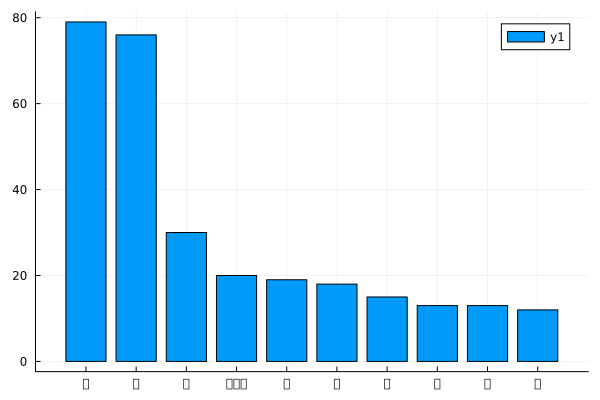

GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 31169
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 12362
GKS: glyph missing from current font: 12414
GKS: glyph missing from current font: 12360
GKS: glyph missing from current font: 29579
GKS: glyph missing from current font: 21451
GKS: glyph missing from current font: 20107
GKS: glyph missing from current font: 26085
GKS: glyph missing from current font: 21531
GKS: glyph missing from current font: 22969
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 31169
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 12362
GKS: glyph missing from current font: 12414
GKS: glyph missing from current font: 12360
GKS: glyph missing from current font: 29579
GKS: glyph missing from current font: 21451
GKS: glyph missing from current font: 20107
GKS: glyph missing from current font: 26085
GKS: glyph missing from current 

In [287]:
bar(noun_cnt_df[begin:10, :].原形, noun_cnt_df[begin:10, :].nrow)

In [284]:
noun_cnt_df[begin:10, :]

,原形,nrow
,String,Int64
1,の,79
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,日,13
9,君,13


## 59

In [288]:
ENV["GKS_ENCODING"] = "utf8"
using Plots
gr(fontfamily="IPAMincho")

Plots.GRBackend()

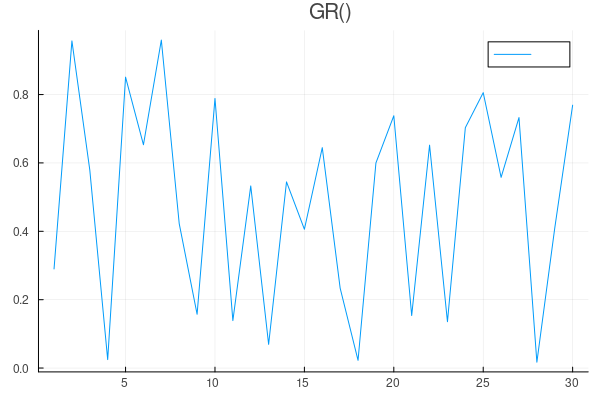

GKS: glyph missing from current font: 26085
GKS: glyph missing from current font: 26412
GKS: glyph missing from current font: 35486
GKS: glyph missing from current font: 34920
GKS: glyph missing from current font: 31034
GKS: glyph missing from current font: 26085
GKS: glyph missing from current font: 26412
GKS: glyph missing from current font: 35486
GKS: glyph missing from current font: 34920
GKS: glyph missing from current font: 31034
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12480
GKS: glyph missing from current font: 12512
GKS: invalid bitmap size


In [289]:
plot(rand(30),title="日本語表示 GR()",label="ランダム")

In [291]:
using WordCloud

color scheme: :tableau_orange_light, random size: 1
angles = -90:5:90


backgroundcolor = :maskcolor
shape(

ellipse, 915, 915, color=(0.164, 0.12, 0.138), padding=81)
mask size: 1077×1077, content area: 810² (30²/word)


set fontsize ∈ [8.0, 1077]
set density = 0.5
⋯scale=33.721780209110655, density=0.14078040837733055	

↓


⋯scale=63.55129215512395, density=0.15502292224731024	↓
⋯scale=272.6178363903503, density=0.15988338392439244	

↓
fontsize ∈ [48.37418270225372, 1077.0]


┌ Warning: Extra large font size detected. The density 0.5 may be unreachable.
└ @ WordCloud /workspaces/100knock-process-visualization/.julia/packages/WordCloud/nwC7b/src/strategy.jl:181
┌ Warning: Some words are limited to the maximum font size. Please set a `maxfontsize` in `wordcloud` or set a `maxweight` in `processtext`.
└ @ WordCloud /workspaces/100knock-process-visualization/.julia/packages/WordCloud/nwC7b/src/wc-method.jl:65


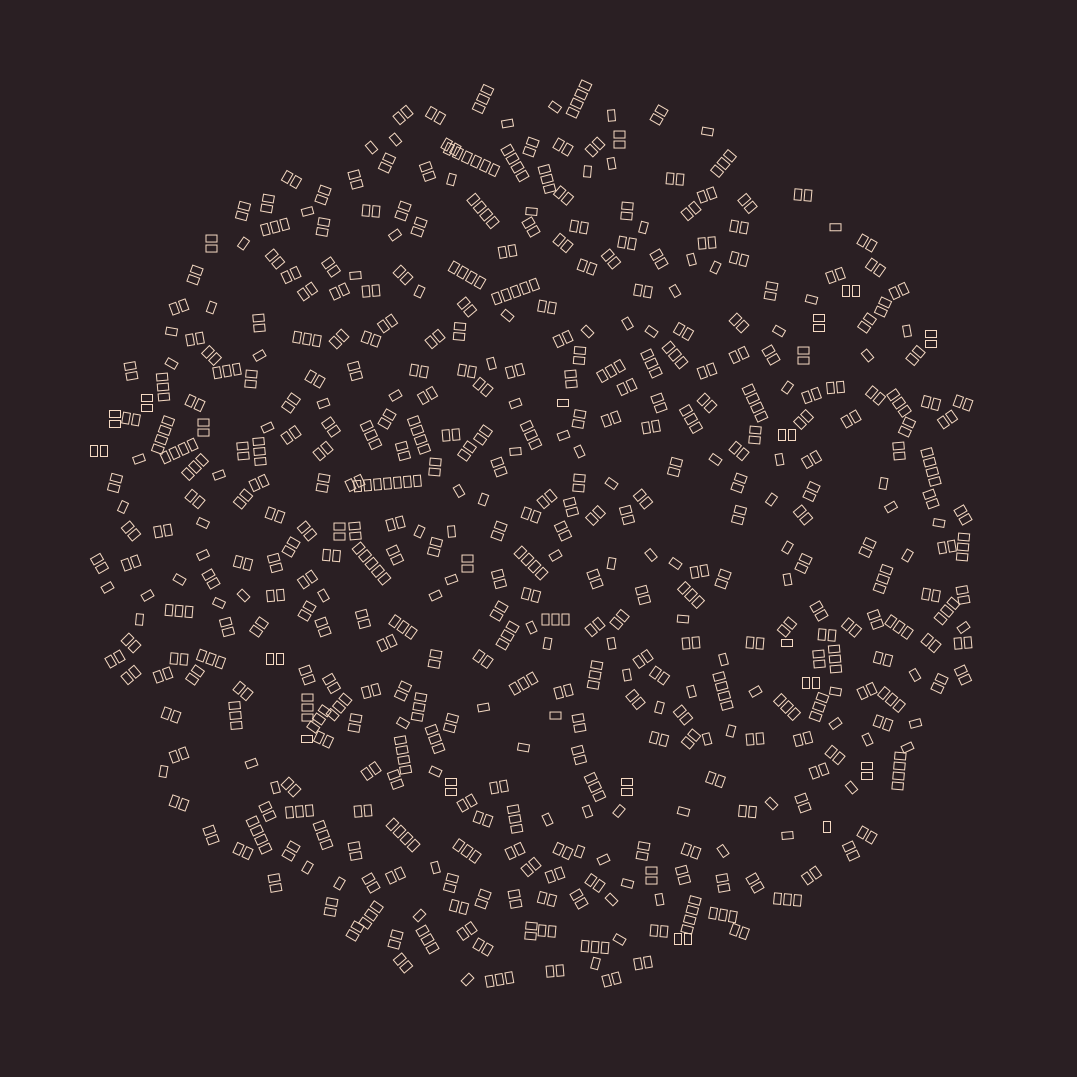

In [294]:
wc = wordcloud(noun_cnt_df.原形, noun_cnt_df.nrow, fonts="IPAMincho")

▸1. scale = 272.6178363903503
4 epochs


┌ Info: nepoch: 1000, patient: 10
└ @ Stuffing.Trainer /workspaces/100knock-process-visualization/.julia/packages/Stuffing/oYQwL/src/fit.jl:482


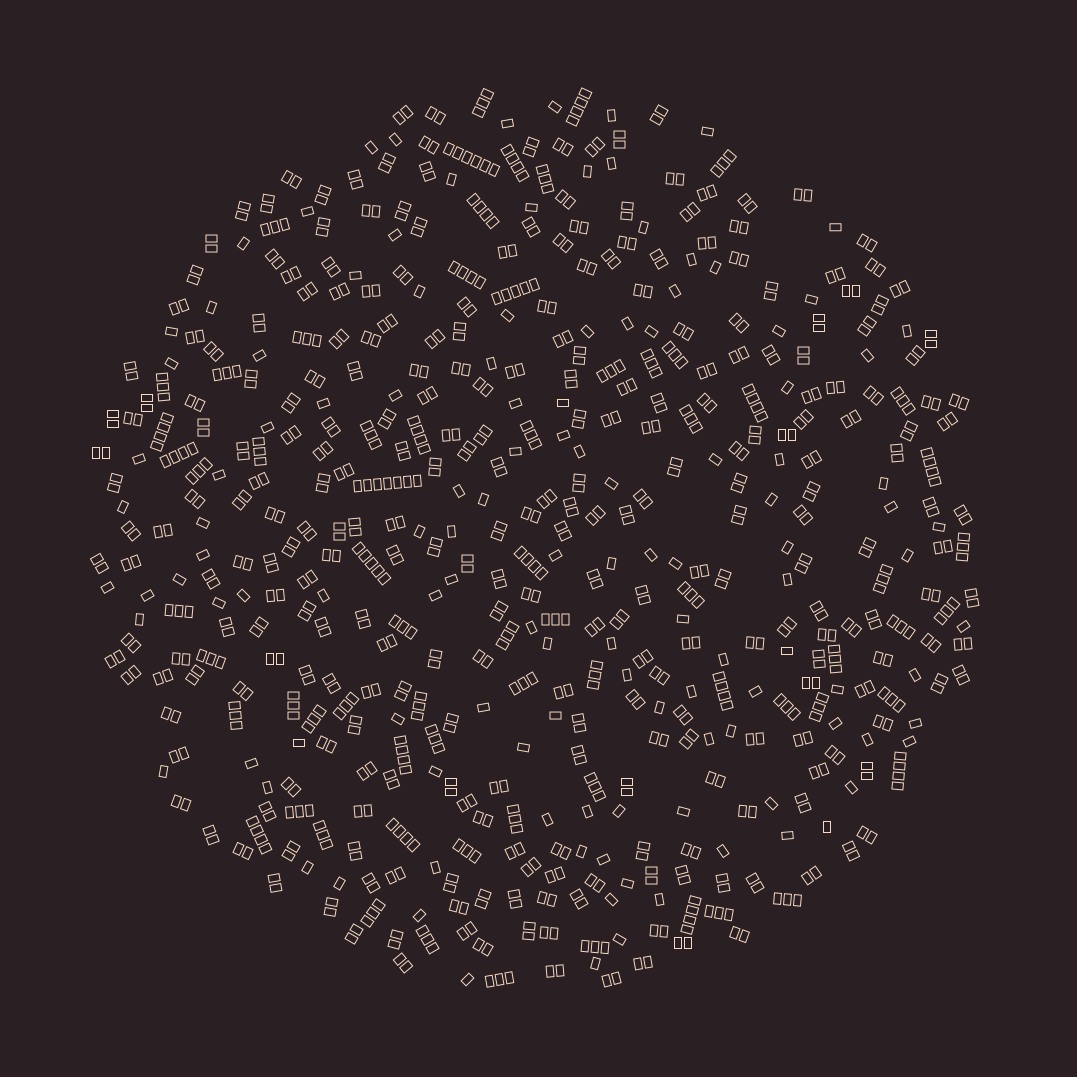

In [295]:
generate!(wc)

## 60

In [296]:
first(df)

,原形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,発音,表層形
,String,String,String,String,String,String,String,String,String
1,走れる,動詞,自立,*,*,一段,連用形,ハシレ,走れ


In [297]:
target = df.表層形

6711-element Vector{String}:
 "走れ"
 "太宰"
 "治"
 "【"
 "テキスト"
 "中"
 "に"
 "現れる"
 "記号"
 "について"
 ⋮
 "た"
 "の"
 "は"
 "、"
 "ボランティア"
 "の"
 "皆さん"
 "です"
 "。"

In [298]:
ngram(s,n) = [view(s,i:i+n-1) for i=1:length(s)-n+1]

ngram (generic function with 1 method)

In [301]:
bigram = ngram(target, 2)

6710-element Vector{SubArray{String, 1, Vector{String}, Tuple{UnitRange{Int64}}, true}}:
 ["走れ", "太宰"]
 ["太宰", "治"]
 ["治", "【"]
 ["【", "テキスト"]
 ["テキスト", "中"]
 ["中", "に"]
 ["に", "現れる"]
 ["現れる", "記号"]
 ["記号", "について"]
 ["について", "】"]
 ⋮
 ["あたっ", "た"]
 ["た", "の"]
 ["の", "は"]
 ["は", "、"]
 ["、", "ボランティア"]
 ["ボランティア", "の"]
 ["の", "皆さん"]
 ["皆さん", "です"]
 ["です", "。"]

In [304]:
using StatsBase

In [312]:
sort(collect(countmap(bigram)), by=x->x[2], rev=true)

4093-element Vector{Pair{SubArray{String, 1, Vector{String}, Tuple{UnitRange{Int64}}, true}, Int64}}:
     ["た", "。"] => 143
     ["は", "、"] => 131
     ["だ", "。"] => 72
     ["。", "」"] => 55
     ["の", "だ"] => 45
     ["て", "、"] => 39
     ["私", "は"] => 36
     ["。", "私"] => 34
   ["て", "いる"] => 33
     ["。", "「"] => 31
                  ⋮
   ["を", "持ち"] => 1
   ["出発", "を"] => 1
     ["、", "海"] => 1
   ["牧人", "は"] => 1
 ["不貞腐", "《"] => 1
 ["くらい", "の"] => 1
   ["。", "また"] => 1
   ["て", "歩い"] => 1
   ["「", "やめ"] => 1